In [819]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [820]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_3.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_VERB_r,ADV_ADV_r,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf,dif,accion,CLASS
0,28.645093,1.631951,9.032564,0.000000,6.144412,0.127508,0.000000,0.00000,4.677207,0.303176,...,0.000000,0.0,0,0,2,2,6,0.900000,0.235279,entailment
1,26.671300,3.984223,4.437697,0.000000,2.492923,8.615627,0.000000,0.00000,9.887845,0.000000,...,0.000000,0.0,4,0,0,1,7,1.045455,0.182328,entailment
2,14.880619,1.824592,3.687874,0.000000,5.383794,1.300978,3.665578,0.00000,1.199861,0.347017,...,0.000000,0.0,1,0,0,0,0,1.000000,0.360803,contradiction
3,7.112267,0.000000,4.998954,0.000000,3.913144,0.000000,0.000000,0.00000,4.153236,0.000000,...,0.000000,0.0,2,0,0,0,2,0.920000,1.000000,contradiction
4,14.623623,0.000000,1.083491,0.000000,1.657801,0.000000,0.000000,0.00000,3.077783,0.000000,...,0.411897,0.0,2,0,0,0,1,0.809524,0.459732,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22.531673,4.194771,1.396518,1.896350,0.000000,5.424360,1.283683,0.00000,3.104924,1.004280,...,0.000000,0.0,1,0,0,2,2,0.650000,1.000000,entailment
96,11.299096,0.000000,0.397504,0.000000,5.716955,0.000000,0.512868,0.00000,0.000000,0.000000,...,0.000000,0.0,3,0,0,1,0,0.444444,0.895790,entailment
97,6.672148,0.000000,5.138863,0.000000,0.000000,0.000000,0.000000,0.00000,3.334945,0.000000,...,0.000000,0.0,0,0,0,0,2,0.923077,0.265505,contradiction
98,7.110450,0.000000,0.658881,0.000000,0.000000,0.000000,0.000000,0.00000,2.450452,0.000000,...,0.000000,0.0,2,0,0,0,0,1.222222,0.577761,contradiction


In [821]:
#dataframe.corr()

In [822]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_r,ADV_VERB_r,ADV_ADV_r,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf,dif,accion
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.000084,1.966909,3.329762,0.714661,4.027800,1.670292,0.708723,0.286763,3.231024,0.323173,...,0.066035,0.119613,0.032855,2.070000,0.030000,0.380000,0.330000,2.120000,1.009862,0.536207
std,13.066107,3.663051,3.705304,1.865683,5.916808,3.708663,1.476073,1.224743,3.755477,0.811359,...,0.276378,0.481001,0.233131,1.465116,0.171447,0.599326,0.667499,2.621897,0.224374,0.305829
min,0.916115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.179143
25%,9.314418,0.000000,0.325808,0.000000,0.000000,0.000000,0.000000,0.000000,1.096962,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.875000,0.286664
50%,14.530209,0.000000,2.048562,0.000000,2.046613,0.000000,0.000000,0.000000,2.370600,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.398907
75%,22.358584,2.639672,5.007361,0.000000,5.493229,0.862745,0.984578,0.000000,3.736365,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,3.000000,1.133540,0.889210
max,72.258190,19.695068,19.075915,8.491863,35.697347,20.094136,8.336549,9.572460,20.975957,5.915599,...,2.075943,3.635319,1.856513,6.000000,1.000000,2.000000,3.000000,13.000000,1.777778,1.000000


In [823]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


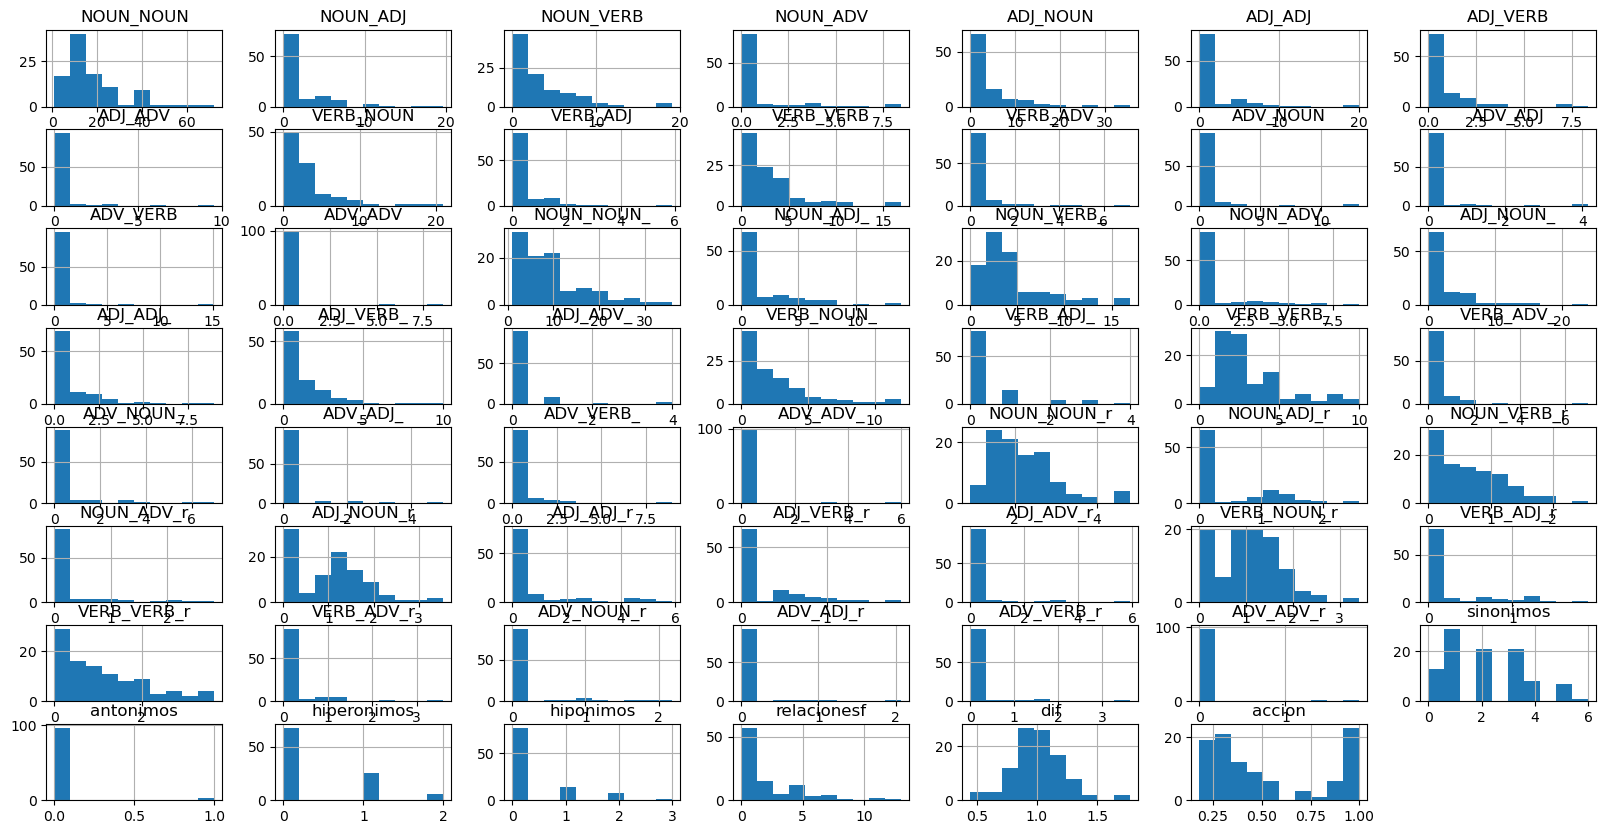

In [824]:
dataframe.hist(figsize=(20,10))
plt.show()

In [825]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [826]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [827]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_13280\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_13280\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 55)

In [828]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [829]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [830]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [831]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [832]:
model.decision_function(X)

array([[-1.33331740e-01,  2.86798584e-01, -1.53466844e-01],
       [-1.37465052e+00,  1.15889252e+00,  2.15757998e-01],
       [ 6.93764682e-01, -2.09985592e-01, -4.83779090e-01],
       [ 2.36287700e-01, -1.18826392e-02, -2.24405060e-01],
       [-7.41651103e-02, -5.21121891e-02,  1.26277299e-01],
       [ 4.22870947e-01, -4.45531135e-01,  2.26601886e-02],
       [-9.39968361e-01,  1.36621085e+00, -4.26242485e-01],
       [-6.13858097e-01,  1.28892154e+00, -6.75063447e-01],
       [ 6.84894815e-01, -1.09785350e+00,  4.12958689e-01],
       [-7.30478044e-01,  1.48504868e+00, -7.54570635e-01],
       [-2.32901718e+00,  7.22261931e-01,  1.60675525e+00],
       [ 3.64990632e-01, -1.90568396e-01, -1.74422236e-01],
       [-1.14625408e+00,  9.73131039e-01,  1.73123038e-01],
       [ 1.43545074e+00,  2.63420392e-01, -1.69887113e+00],
       [-1.49395139e+00,  2.11013431e-03,  1.49184125e+00],
       [-2.71611561e-01,  4.26472011e-01, -1.54860450e-01],
       [-2.54327077e+00,  2.29128082e+00

In [833]:
labels=dataframe.columns[1:]

In [834]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [835]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [836]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  33 NOUN_VERB_r 48 antonimos
Entailment  48 antonimos 33 NOUN_VERB_r
Neutral  30 ADV_ADV_ 3 ADJ_NOUN


In [837]:
n_columns=dataframe.shape[1]-1

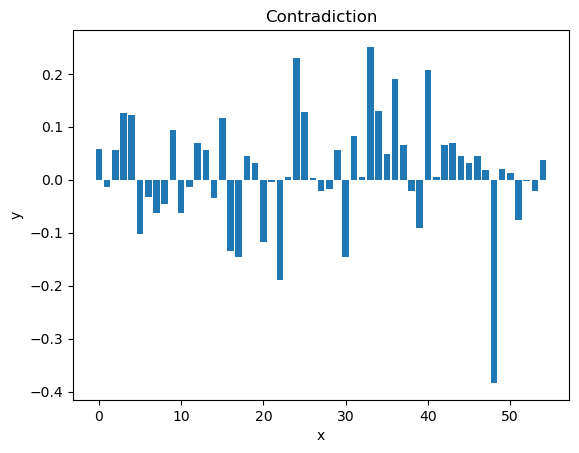

In [838]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

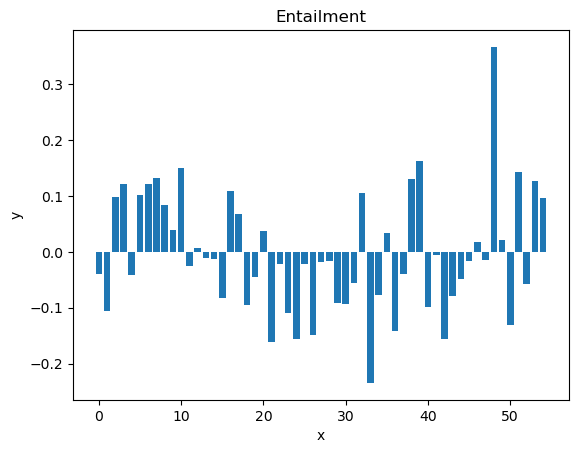

In [839]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

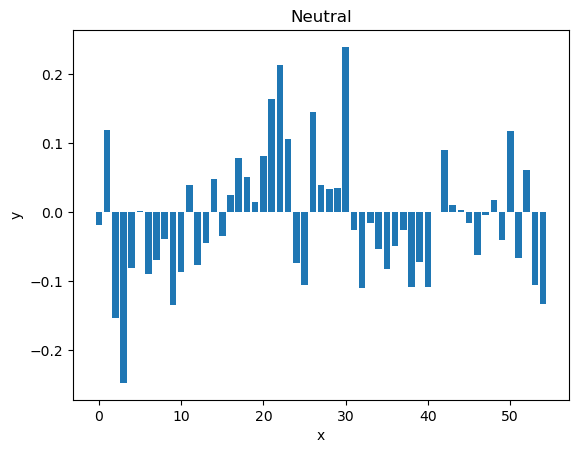

In [840]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [841]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'contradiction' 'contradiction' 'neutral'
 'contradiction' 'entailment' 'entailment' 'contradiction' 'entailment'
 'neutral' 'contradiction' 'entailment' 'contradiction' 'neutral'
 'entailment' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'neutral' 'contradiction' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'contradiction' 'contradiction' 'contradiction' 'neutral'
 'entailment' 'contradiction' 'neutral' 'neutral' 'neutral' 'neutral'
 'contradiction' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'neutral' 'entailment' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'entailment' 'contradiction' 'contradiction'
 'contradiction' 'neutral' 'neutral' 'entailment'

In [842]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [843]:
X

array([[28.64509261,  1.63195105,  9.03256369, ...,  6.        ,
         0.9       ,  0.23527944],
       [26.67130001,  3.98422295,  4.43769664, ...,  7.        ,
         1.04545454,  0.18232787],
       [14.88061917,  1.82459164,  3.68787432, ...,  0.        ,
         1.        ,  0.36080334],
       ...,
       [ 6.67214802,  0.        ,  5.13886273, ...,  2.        ,
         0.92307692,  0.26550528],
       [ 7.11044979,  0.        ,  0.6588807 , ...,  0.        ,
         1.22222222,  0.57776094],
       [13.31903434,  0.        ,  0.19219354, ...,  2.        ,
         1.17857143,  0.25216368]])

In [844]:
model.score(X,y)

0.8

In [845]:
print(confusion_matrix(y, predictions))

[[20  4  3]
 [ 2 38  2]
 [ 4  5 22]]


In [846]:
print(f1_score(y,predictions, average=None))

[0.75471698 0.85393258 0.75862069]


In [847]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [848]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: 0.487500 (0.201168)


c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [849]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.7


In [850]:
print(confusion_matrix(Y_validation, predictions))

[[4 2 2]
 [0 7 0]
 [1 1 3]]


In [851]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.80      0.50      0.62         8
   entailment       0.70      1.00      0.82         7
      neutral       0.60      0.60      0.60         5

     accuracy                           0.70        20
    macro avg       0.70      0.70      0.68        20
 weighted avg       0.72      0.70      0.68        20



In [852]:
#X_new = pd.DataFrame()
#model.predict(X_new)